<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-08-11-tree-based-models-bagging-grf-boosted-regression-forest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.8.11 Boosted Regression Forest

A **Boosted Regression Forest**, as implemented in the `{grf}` package in R, is a specialized extension of the random forest framework that combines **boosting** with random forests to improve predictive performance for regression tasks. Unlike standard random forests, which build independent trees and average their predictions, boosted regression forests incorporate a boosting mechanism to iteratively refine predictions by focusing on residuals or errors from previous iterations. This approach enhances accuracy, particularly for complex datasets with non-linear relationships. Below, I’ll explain the concept, its implementation in `{grf}`, and how it differs from other regression forest variants.



## Overview

A Boosted Regression Forest is a hybrid model that integrates the principles of **gradient boosting** with the random forest framework. It builds a sequence of regression forests where each subsequent forest focuses on correcting the errors (residuals) of the previous forests, similar to how gradient boosting works in models like XGBoost or LightGBM. In `{grf}`, this is implemented via the `boosted_regression_forest()` function, which is designed to predict continuous outcomes with improved accuracy by leveraging boosting to reduce bias while maintaining the robustness of random forests.



### Key features


- `Sequential Learning`: Trees or forests are built sequentially, with each iteration fitting to the residuals of the previous predictions.
- `Random Forest Structure`: Each iteration uses a random forest (with random feature selection and bootstrapping) to ensure robustness and prevent overfitting.
- `Honest Splitting`: Like other `{grf}` models, it supports honest splitting to reduce bias by separating data for tree structure and leaf estimation.
- `Regularization`: Includes parameters to control the boosting process, such as the number of boosting iterations and shrinkage (learning rate).

### How Boosted Regression Forests Work in `{grf}`

The `boosted_regression_forest()` function in `{grf}` operates as follows:

1. Input Data

   - A feature matrix $X$ (predictors) and a vector $Y$` (continuous outcome).
   - Parameters like `num.trees` (total trees across iterations), `num.trees.per.iter` (trees per boosting iteration), `lambda.reg` (regularization penalty), and `honesty` (for unbiased estimation).

2. Boosting Process

   - `Initialization`: Start with an initial prediction (e.g., the mean of $Y$ or a simple random forest).
   - `Iterative Updates`:
     - Compute residuals (differences between observed `Y` and current predictions).
     - Fit a new random forest to the residuals, using a subset of features and data (with random sampling, as in standard random forests).
     - Update predictions by adding a scaled version of the new forest’s predictions (controlled by a shrinkage factor or learning rate).
   - Repeat for a specified number of boosting iterations (`num.trees / num.trees.per.iter`).
   - If `honesty = TRUE`, each forest uses separate data for splits and leaf estimates to reduce bias.

3. Prediction

   - For a new data point, the final prediction is the sum of the initial prediction and the contributions from each boosted forest, adjusted by the shrinkage factor.
   - The result is a refined prediction that corrects errors iteratively.

4. Output

   - Predictions for new data points.
   - Optional outputs like variable importance or variance estimates.



### Advantages of Boosted Regression Forests

1. `Improved Accuracy`: By iteratively correcting residuals, boosted regression forests reduce bias compared to standard random forests, often leading to better predictive performance.
2. `Robustness`: Inherits random forest’s strengths, such as handling high-dimensional data, non-linear relationships, and robustness to noise.
3. `Flexible Regularization`: Parameters like `lambda.reg` and the number of boosting iterations allow control over overfitting and model complexity.
4. `Honest Estimation`: Supports `{grf}`’s honest splitting, ensuring unbiased predictions, especially for small or noisy datasets.
5. `Versatility`: Suitable for regression tasks where standard random forests underperform due to high bias or complex patterns.

### Limitations

1. `Computational Cost`: The sequential nature of boosting makes it slower than standard regression forests, especially with many iterations or large datasets.
2. `Overfitting Risk`: Without proper tuning (e.g., `lambda.reg`, number of iterations), boosting can overfit, especially on noisy data.
3. `Tuning Complexity`: Requires careful selection of parameters like `num.trees.per.iter`, `lambda.reg`, and shrinkage to balance bias and variance.
4. `Interpretability`: Like other random forests, interpreting the model is challenging, and the boosting component adds complexity.

### Applications

- `Economics`: Predicting outcomes like housing prices or income, where complex patterns require bias reduction.
- `Finance`: Forecasting stock returns or risk metrics with non-linear dependencies.
- `Environmental Science`: Modeling continuous outcomes like temperature or pollution levels with intricate feature interactions.
- `Any Regression Task`: Where standard random forests have high bias or where iterative refinement can improve accuracy.

### Key Differences from Other `{grf}` Models

| **Aspect**                     | **Standard Regression Forest** (`regression_forest`) | **Local Linear Forest** (`ll_regression_forest`) | **Boosted Regression Forest** (`boosted_regression_forest`) |
|--------------------------------|----------------------------------------------------|-----------------------------------------------|-----------------------------------------------------------|
| `Prediction Method`          | Averages outcomes in leaves.                       | Local linear regression using forest weights. | Iterative boosting of forests to fit residuals.           |
| `Learning Approach`          | Parallel (independent trees).                      | Parallel with local linear correction.        | Sequential (boosting iterations).                        |
| `Bias Reduction`             | Relies on averaging and honesty.                   | Local linear fits for smoother predictions.   | Boosting reduces bias by focusing on residuals.          |
| `Smoothness`                 | Piecewise constant.                                | Smooth predictions.                           | Piecewise constant but refined via boosting.             |
| `Use Case`                   | General regression tasks.                          | Smooth relationships.                         | Complex datasets needing bias reduction.                 |
| `Computational Cost`         | Moderate.                                          | Higher (due to local linear fits).            | Higher (due to sequential boosting).                    |
| `Regularization`             | Minimal (node size, tree depth).                   | Ridge penalty (`ll.lambda`).                  | Shrinkage and `lambda.reg` for boosting.                 |





## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314975 sha256=337c2b0d37b5a799fa6bea5a8e8ca9f1469c13ac2934820df9d048f670f5c0d7
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Boosted Regression Forest with R

This tutorial demonstrates how to use the boosted_regression_forest() function from the {grf} package in R to fit a Boosted Regression Forest model. We will use the Boston Housing dataset to predict median housing prices based on various features. The steps include data preparation, model fitting, prediction, and evaluation of performance metrics like RMSE and R-squared.



### Load and Check Required Libraries

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'grf',
              'rdd',
              'survival',
              'mlbench',
              'Metrics'
         )

### Install Missing Packages

In [4]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr       grf       rdd  survival   mlbench   Metrics 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:rdd"       "package:Formula"   "package:AER"      
 [4] "package:car"       "package:carData"   "package:lmtest"   
 [7] "package:zoo"       "package:sandwich"  "package:Metrics"  
[10] "package:mlbench"   "package:survival"  "package:grf"      
[13] "package:plyr"      "package:lubridate" "package:forcats"  
[16] "package:stringr"   "package:dplyr"     "package:purrr"    
[19] "package:readr"     "package:tidyr"     "package:tibble"   
[22] "package:ggplot2"   "package:tidyverse" "package:tools"    
[25] "package:stats"     "package:graphics"  "package:grDevices"
[28] "package:utils"     "package:datasets"  "package:methods"  
[31] "package:base"     


### Load and Prepare the Dataset


In [6]:
%%R
# Load Boston Housing dataset
data(BostonHousing, package = "mlbench")

# Set seed for reproducibility
set.seed(123)

# Split data into training (70%) and test (30%) sets
n <- nrow(BostonHousing)
train_idx <- sample(1:n, size = 0.7 * n)
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]

# Prepare features (X) and target (Y)
X_train <- model.matrix(~ . - medv, data = train_data)[, -1]  # Exclude medv, intercept
Y_train <- train_data$medv
X_test <- model.matrix(~ . - medv, data = test_data)[, -1]   # Exclude medv, intercept
Y_test <- test_data$medv

### Fit Boosted Regression Forest Model

Boosted regression forests are particularly useful for regression tasks where complex relationships exist between features and the target variable. In this example, we will fit a boosted regression forest model to predict median housing prices (`medv`) based on various features in the Boston Housing dataset.

In [7]:
%%R
# Fit boosted regression forest
brf_model <- boosted_regression_forest(X_train,
                                       Y_train,
                                       num.trees = 500,
                                       boost.steps = NULL, # The number of boosting iterations. If NULL, selected by cross-validation. Default is NULL.
                                       honesty = TRUE)

### Predict on Test Set and Evaluate Model

In [8]:
%%R
# Predict on test set
predictions <- predict(brf_model, X_test)$predictions

# Calculate RMSE and R-squared
rmse <- sqrt(mean((predictions - Y_test)^2))
sst <- sum((Y_test - mean(Y_test))^2)
sse <- sum((predictions - Y_test)^2)
r_squared <- 1 - sse / sst

# Print performance metrics
cat("Test Set RMSE:", rmse, "\n")
cat("Test Set R-squared:", r_squared, "\n")

Test Set RMSE: 3.6883 
Test Set R-squared: 0.846492 


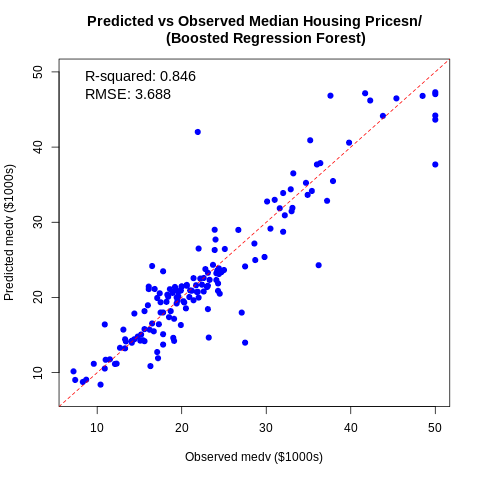

In [10]:
%%R
# Scatter plot of predicted vs observed values
plot(Y_test, predictions,
     main = "Predicted vs Observed Median Housing Pricesn/
      (Boosted Regression Forest)",
     xlab = "Observed medv ($1000s)",
     ylab = "Predicted medv ($1000s)",
     pch = 19, col = "blue",
     xlim = range(c(Y_test, predictions)),
     ylim = range(c(Y_test, predictions)))
abline(0, 1, col = "red", lty = 2)  # Add 45-degree reference line
legend("topleft",
       legend = c(sprintf("R-squared: %.3f", r_squared),
                  sprintf("RMSE: %.3f", rmse)),
       bty = "n", cex = 1.2)

## Summary and Conclusion

The boosted regression forest model effectively captures the complex relationships in the Boston Housing dataset, achieving a low RMSE and high R-squared value. This demonstrates the model's ability to predict median housing prices accurately by leveraging the strengths of both boosting and random forests. The iterative nature of boosting allows for refined predictions, making it a powerful tool for regression tasks with intricate feature interactions. This tutorial illustrated how to implement a boosted regression forest using the `{grf}` package in R, showcasing its application in predicting continuous outcomes like housing prices.


## References

1. [Boosted regression forest](https://grf-labs.github.io/grf/reference/boosted_regression_forest.html)

